In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import math
import warnings
warnings.filterwarnings('ignore')


In [20]:
train=pd.read_csv('C:\\Users\\V Vignesh\\Desktop\\COVID\\train.csv')

In [21]:
train_india=train[train['Country_Region'] == 'India'] 
train_india

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
8978,13401,NaN,India,2020-01-22,0.0,0.0
8979,13402,NaN,India,2020-01-23,0.0,0.0
8980,13403,NaN,India,2020-01-24,0.0,0.0
8981,13404,NaN,India,2020-01-25,0.0,0.0
8982,13405,NaN,India,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
9040,13463,NaN,India,2020-03-24,536.0,10.0
9041,13464,NaN,India,2020-03-25,657.0,12.0
9042,13465,NaN,India,2020-03-26,727.0,20.0
9043,13466,NaN,India,2020-03-27,887.0,20.0


In [22]:
confirmed_cases_india=train_india.iloc[:,4].values
date_india=train_india.iloc[:,3].values
fatalities=train_india.iloc[:,5].values
print(len(date_india),len(confirmed_cases_india),len(fatalities))
print("DATA COLLECTED UPTO : ",date_india[-1])

67 67 67
DATA COLLECTED UPTO :  2020-03-28


# Plotting number of fatalities

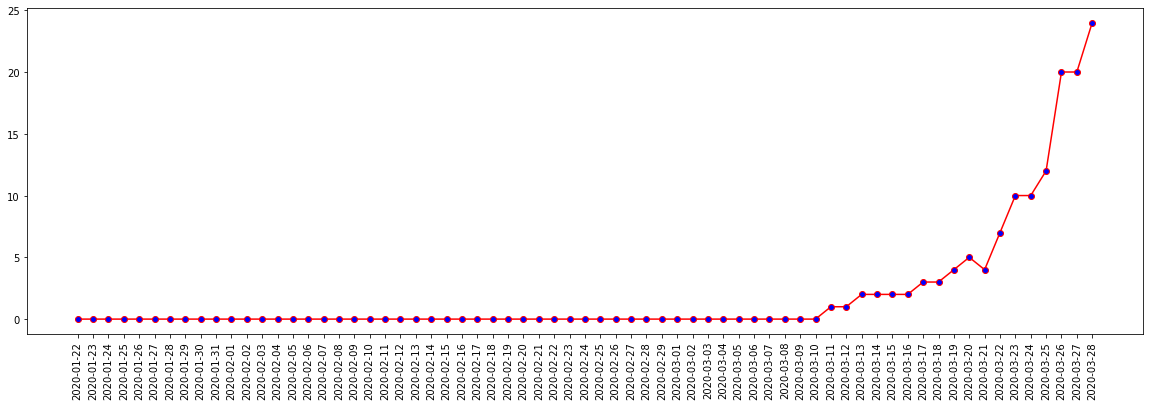

In [23]:
plt.figure(1,figsize=(20, 6))

plt.plot(date_india,fatalities,color='red',marker='o',markerfacecolor='b')
plt.xticks(rotation=90)
plt.show()


# Percentage of fatalities among all confirmed cases

In [24]:
percent_fatalities=(fatalities/confirmed_cases_india)*100
percent_fatalities=[0.0 if math.isnan(x) else x for x in percent_fatalities]

l=0
sum=0
for i in range(0,len(percent_fatalities)):
    if(percent_fatalities[i]!=0.0):
        sum+=percent_fatalities[i]
        l+=1
        
average_percent_fatalities=sum/l
print("\033[1m","Average percentage of Fatalities : ",average_percent_fatalities,"%",'\033[0m')

 Average percentage of Fatalities :  1.9496301867214036 % 


# Plotting percentage increase in the number of cases

In [25]:
percent_inc=[]
for i in range(0,len(confirmed_cases_india)-1):
    if(confirmed_cases_india[i]!=0):
        percent_inc.append(((confirmed_cases_india[i+1]-confirmed_cases_india[i])/confirmed_cases_india[i]  )*100)
    else:
        percent_inc.append(float(0.0))
    

In [26]:
len(percent_inc)

66

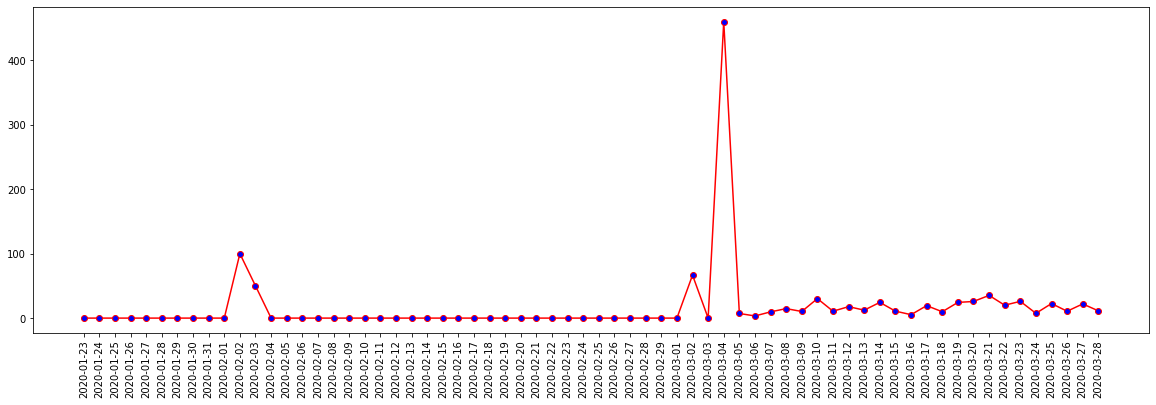

In [27]:
plt.figure(1,figsize=(20, 6))

plt.plot(date_india[1:],percent_inc,color='red',marker='o',markerfacecolor='b')
plt.xticks(rotation=90)
plt.show()


It can be seen that on 3rd march there was a sudden increase in the number of confirmed cases(An increase by 460%) in a single day.This is considered as the day from when the exponential increase started. We have considered the days after 4rd march for the plotting and analysing purpose below.

In [28]:
y_train=train_india['ConfirmedCases'].apply(lambda x:np.log(x)) #computing log of the confirmed cases
print(len(y_train))

67


# Plotting confirmed cases and log of confirmed cases in last 20 days(From 4th March)

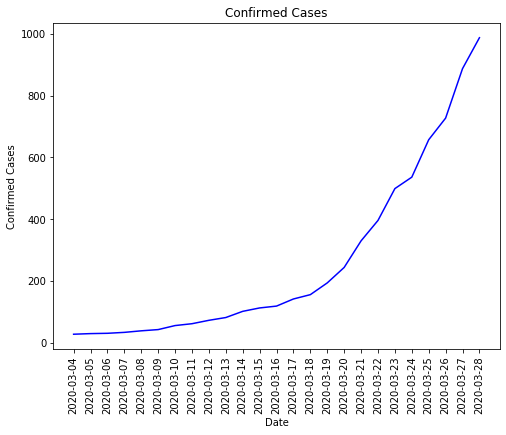

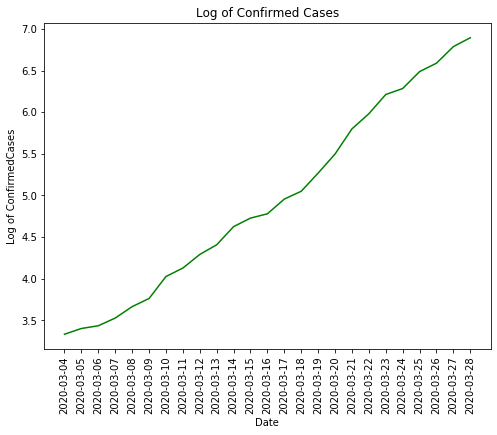

In [29]:
plt.figure(1,figsize=(8, 6))
plt.plot(date_india[42:],confirmed_cases_india[42:],color='b')   
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases")
plt.xticks(rotation=90)
plt.figure(2,figsize=(8, 6))
plt.plot(date_india[42:],y_train[42:],color='g')
plt.xlabel("Date")
plt.ylabel("Log of ConfirmedCases")
plt.title("Log of Confirmed Cases")

plt.xticks(rotation=90)

plt.show()

We can see that the second plot gives a pretty much a straight line which is good for linear regression model.
Also we are considering only the last 10 days for prediction in order the study the short term evolution and to avaoid certain factors that has effected the transmission rate such as(quarantine vs non quarantine).
(We are considering the days after when the issue was taken up seriously by the nation and social distancing was started being followed)

# Prediction using Linear Regression Model

In [30]:
#Firstly the dates would be considered in numbers(integers)
x_train=np.arange(len(date_india)) [-10:].reshape(-1,1)
y_train=np.array(y_train)[-10:].reshape(-1,1)


In [31]:
regressor=linear_model.LinearRegression()
regressor.fit(x_train,y_train)

prediction=regressor.predict(x_train)

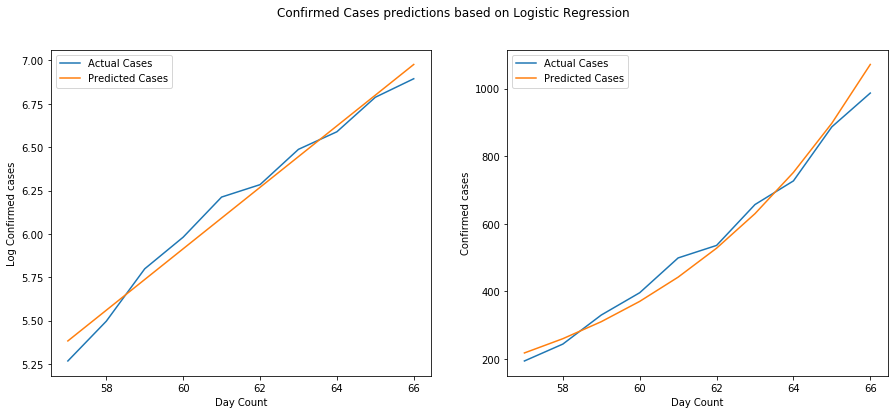

In [32]:
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(15,6))

#plt.figure(1)
plt1.plot(x_train,y_train)
plt1.plot(x_train,prediction)
plt1.set_xlabel("Day Count")
plt1.set_ylabel("Log Confirmed cases")
plt1.legend(['Actual Cases','Predicted Cases'])

#plt.figure(2)
plt2.plot(x_train,np.exp(y_train))
plt2.plot(x_train,np.exp(prediction))
plt2.set_xlabel("Day Count")
plt2.set_ylabel("Confirmed cases")
plt2.legend(['Actual Cases','Predicted Cases'])
plt.suptitle(("Confirmed Cases predictions based on Logistic Regression "))
plt.show()

# Prediction for the next upcomming days

In [33]:
n=int(input("Enter the number of upcomming days : "))
x_test=np.array([i for i in range( len(date_india), len(date_india)+n)]).reshape(-1,1)

next_predictions=regressor.predict(x_test)
pred=np.exp(next_predictions)
print("PREDICTION OF CONFIRMED CASES FOR NEXT ",n," days : \n ",pred)

Enter the number of upcomming days : 5
PREDICTION OF CONFIRMED CASES FOR NEXT  5  days : 
  [[1279.20183579]
 [1526.99272508]
 [1822.78254864]
 [2175.86905624]
 [2597.35104083]]
